# Data Exploration 

## Importing necessary libraries

In [ ]:
!nltk.download('punkt')

/bin/bash: -c: line 0: syntax error near unexpected token `'punkt''
/bin/bash: -c: line 0: `nltk.download('punkt')'


In [ ]:
# Importing necessary librairies
from collections import Counter, deque
from google.colab import drive
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import pickle 
import seaborn as sns
from wordcloud import WordCloud

## Importing Personal Drive 

In [ ]:
# Mount Google Drive to this Notebook instance.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the pre-processed data

In [ ]:
file = '/content/drive/MyDrive/Data/SummaDevDocs_preprocesssed.pickle'
df = pd.read_pickle(file)

In [ ]:
df

,document_text,summary_text,text_clean,text_embedding,summary_clean,summary_embedding,labels,doc_label
0,The training improved women’s knowledge on the...,The training improved women’s knowledge on the...,[The training improved women’s knowledge on th...,"[[0.76747984, -0.18944956, 0.51285803, -0.0211...",[The training improved women’s knowledge on th...,"[[0.76747984, -0.18944956, 0.51285803, -0.0211...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Illegal oil refining in the Niger Delta is inc...,CEHRD in an effort to create awareness on the ...,[Illegal oil refining in the Niger Delta is in...,"[[-0.34167996, -0.6055787, -0.20679495, -1.148...",[CEHRD in an effort to create awareness on the...,"[[-0.436482, -0.07113252, -0.18081762, -0.4864...","[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,CEHRD successfully set-up 4 formal and 4 infor...,CEHRD set-up the environmental clubs with the ...,[CEHRD successfully set-up 4 formal and 4 info...,"[[-0.4896432, -1.2085572, 1.0374498, 0.0213696...",[CEHRD set-up the environmental clubs with the...,"[[-0.15335679, -0.2943071, 0.58692193, -1.1263...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
3,PROJECT NAME : Delivering Accelerated Family P...,Delivering Accelerated Family Planning in Paki...,"[PROJECT NAME :, Delivering Accelerated Family...","[[-0.23698464, 0.15983887, -0.07119872, -1.200...",[Delivering Accelerated Family Planning in Pak...,"[[-0.50266284, -1.2923898, 0.42068344, -1.2567...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
4,Road traffic injuries are world's eighth leadi...,The Cardiff Trauma Pack Research and Develop...,[Road traffic injuries are world's eighth lead...,"[[-0.466682, -1.1917696, 0.99453795, -0.957597...",[ The Cardiff Trauma Pack Research and Develo...,"[[-0.4679709, -0.43502185, 0.83883774, -1.4754...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
...,...,...,...,...,...,...,...,...
2980,Metta has been responding to the humanitarian ...,"ProjectGoal: To improve the condition of 2,854...",[Metta has been responding to the humanitarian...,"[[-0.6875753, -1.0828757, 0.32236812, -1.33987...","[ProjectGoal:, To improve the condition of 2,8...","[[-0.5820974, 0.02791187, 0.2928526, -1.098855...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[2980, 2980, 2980, 2980, 2980, 2980, 2980, 298..."
2981,"Destined Women is local not for profit\, non-r...",GOAL: Contribute towards changing the socioeco...,"[Destined Women is local not for profit\,, non...","[[-0.91105515, -0.780988, -0.013189635, -0.504...",[GOAL: Contribute towards changing the socioec...,"[[0.06080835, -0.2223898, 0.48705336, -1.54801...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2981, 2981, 2981, 2981, 2981, 2981, 2981, 298..."
2982,The project will empower secondary school stud...,The project will empower secondary school stud...,[The project will empower secondary school stu...,"[[0.2446245, -0.58844894, 1.0700818, -0.348946...",[The project will empower secondary school stu...,"[[0.31522802, -0.6220454, 1.084553, -0.3928656...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[2982, 2982, 2982, 2982, 2982, 2982, 2982]"
2983,The project has been specifically designed to ...,The project has been specifically designed to ...,[The project has been specifically designed to...,"[[0.22308932, -0.042834148, 0.5815844, -0.4814...",[The project has been specifically designed to...,"[[0.24488513, -0.04303686, 0.55787843, -0.5100...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[2983, 2983, 2983, 2983, 2983, 2983]"


## Exploring the text 

In [ ]:
#Viewing means of the document and summaries 
sent_length = pd.DataFrame(df.text_clean.apply(len).values, columns=['Document'])
sent_length['Summary'] = df.summary_clean.apply(len) 
means = pd.DataFrame(sent_length.mean().apply(lambda x: round(x,3)), columns = ['mean'])
means

,mean
Document,13.671
Summary,1.291


In [ ]:
#statistics of lengths for different percentiles 
sent_length_quant = sent_length.quantile([0,0.25,0.5,0.75,0.95,0.99, 1])
sent_length_quant.index.name = 'Percentile'
sent_length_quant.columns.name = 'Number of Sentences'
sent_length_quant

Number of Sentences,Document,Summary
Percentile,,
0.00,2.00,1.0
0.25,9.00,1.0
0.50,11.00,1.0
0.75,15.00,1.0
0.95,30.00,3.0
0.99,53.64,4.0
1.00,173.00,9.0


r_squared =  0.023


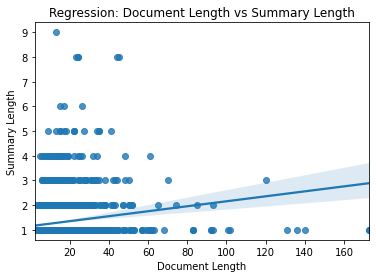

In [ ]:
# Plotting the relationship between 
sns.regplot(x='Document', y='Summary', data=sent_length);
plt.title('Regression: Document Length vs Summary Length')
plt.xlabel('Document Length')
plt.ylabel('Summary Length')
r_squared_matrix = np.corrcoef(sent_length.Document, sent_length.Summary)**2

print('r_squared = ', round(r_squared_matrix[0][1],3))

In [ ]:
# Defining functions to view the main words in the document texts
def count_ngrams(lines, min_length=2, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: Counter() for length in lengths}
    queue = deque(maxlen=max_length)
    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1
# Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in word_tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()
# Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()
        return ngrams

def print_word_cloud(ngrams, num=5):
    """Print word cloud image plot """
    words = []
    for n in sorted(ngrams):
        for gram, count in ngrams[n].most_common(num):
            s = ' '.join(gram)
            words.append(s)
            
    cloud = WordCloud(background_color='white', collocations=False, width=1440, height= 1080,max_words= 200).generate(' '.join(words))
    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()
    print('')

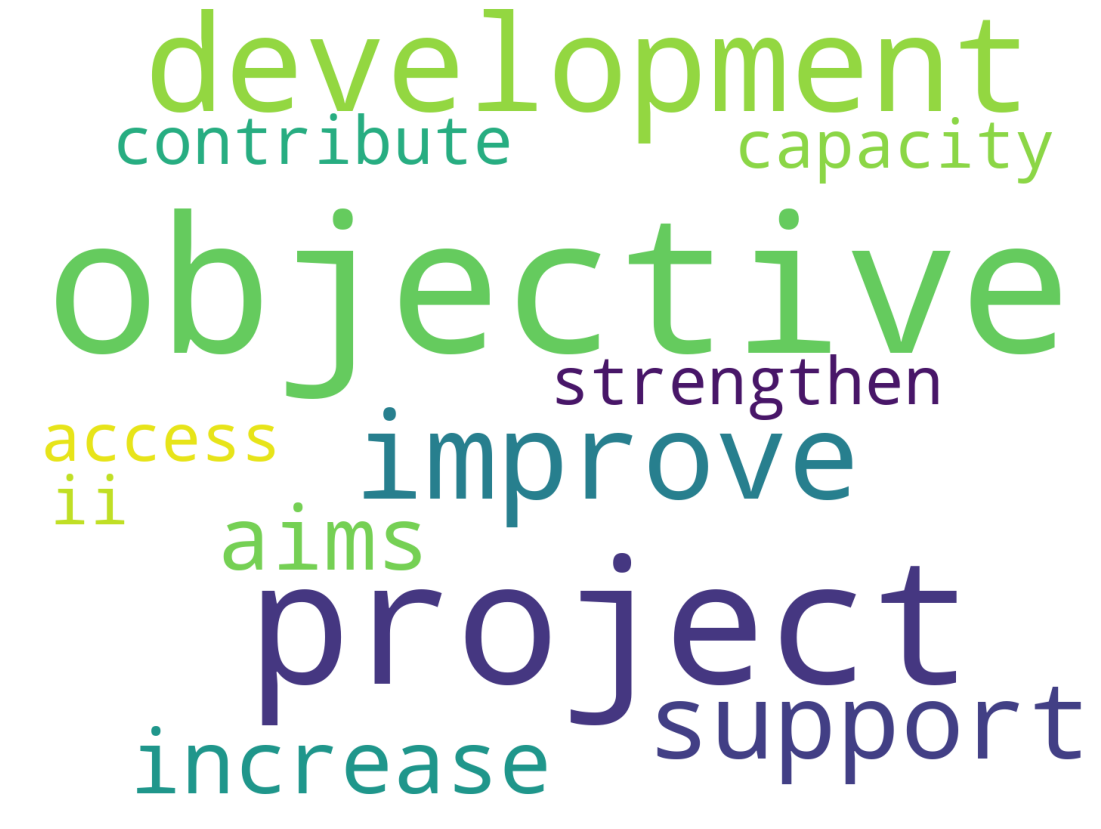

In [ ]:
# applying the functions to the summaries to see the most frequent words 
summaries = df['summary_text']
most_frequent_summary_words = count_ngrams(summaries, max_length=3)
print_word_cloud(most_frequent_summary_words, 25)

In [ ]:
# Counting the number of words in the summary
sentences = [i for i in df['summary_text']]
index = [i for i in range(len(sentences))] 
number_words = []

for i in index:
    word = len(sentences[i].split())
    number_words.append(word)

# Adding the summary number of words as a column
df['summary_number_words'] = number_words

In [ ]:
# Counting the number of words in the documents
sentences = [i for i in df['document_text']]
index = [i for i in range(len(sentences))] 
number_words = []

for i in index:
    word = len(sentences[i].split())
    number_words.append(word)

# Adding the document number of words as a column
df['document_number_words'] = number_words

In [ ]:
# View the summary words statistics 
df['summary_number_words'].describe()

count    2985.000000
mean       39.130653
std        15.147543
min         3.000000
25%        29.000000
50%        37.000000
75%        46.000000
max       127.000000
Name: summary_number_words, dtype: float64

In [ ]:
# View the document words statistics 
df['document_number_words'].describe()

count    2985.000000
mean      321.502178
std       186.998683
min       208.000000
25%       238.000000
50%       264.000000
75%       302.000000
max      2401.000000
Name: document_number_words, dtype: float64

In [ ]:
# Compute the compression ratio
print('the compression ratio is :')
print(321.5/39.1)

the compression ratio is :
8.222506393861892


<function matplotlib.pyplot.show>

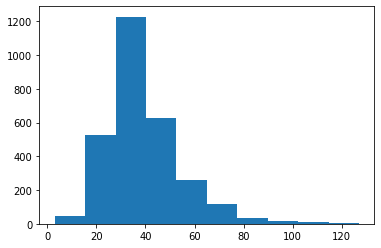

In [ ]:
# Build an histogram of the words distribution in summaries
x = df['summary_number_words']
plt.hist(x)
plt.show

<function matplotlib.pyplot.show>

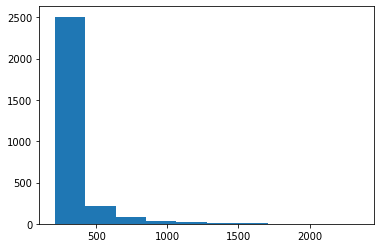

In [ ]:
# Build an histogram of the words distribution in documents
x = df['document_number_words']
plt.hist(x)
plt.show